Resources:

* <https://github.com/andrewcole33/carseat_sales_linreg/blob/master/carseat_nb.ipynb>
* <https://colab.research.google.com/drive/1RC_XulRdrqpYRq4h8pRl22cfg9a-_FvS?usp=sharing>


In [1193]:
import numpy as np
import pandas as pd
import math

from itertools import combinations

import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

from scipy import stats

import matplotlib.pyplot as plt
import plotly.express as px

In [1194]:
#plt.style.use("dark_background")

### Exploritory Data Analysis

In [1195]:
carsData = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data

cars = pd.DataFrame(carsData)


* mpg	Miles/(US) gallon
* cyl	Number of cylinders
* disp Displacement (cu.in.)
* hp Gross horsepower
* drat Rear axle ratio
* wt Weight (1000 lbs)
* qsec 1/4 mile time
* vs Engine (0 = V-shaped, 1 = straight)
* am Transmission (0 = automatic, 1 = manual)
* gear Number of forward gears
* carb Number of carburetors

In [1196]:
cars.info()

cars

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### Cleaning

In [1197]:
# adjusting columns that are better represented as factors
categoricals = ["vs", "am"]

for col in categoricals:
    cars[col] = cars[col].astype(object)


def genCategoricalLabels(labelPrefix: str, lowerBound: int, upperBound: int) -> dict:
    labels = {}
    for i in range(lowerBound, upperBound+1):
        labels.update({i:labelPrefix + str(i)})
    return labels


#cars.cyl = cars.cyl.map({4:"cyl4",6:"cyl6",8:"cyl8"})

### Preprocessing

In [1198]:
df = cars.copy().reset_index().drop("index", axis = 1)

x = df.drop("mpg", axis = 1)

y = df.mpg

In [1199]:
# Train Test Split (70/30 size)
# no need to clean sample dataset

# xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 33)

xTrain = x
yTrain = y

#### Numeric

In [1200]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     32 non-null     int64  
 1   disp    32 non-null     float64
 2   hp      32 non-null     int64  
 3   drat    32 non-null     float64
 4   wt      32 non-null     float64
 5   qsec    32 non-null     float64
 6   vs      32 non-null     object 
 7   am      32 non-null     object 
 8   gear    32 non-null     int64  
 9   carb    32 non-null     int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 2.6+ KB


In [1201]:
xTrainNumeric = xTrain.select_dtypes(exclude = 'object')

# Set numeric dataframe columns
xNumericCols = xTrainNumeric.columns
xTrainNumeric.columns = xNumericCols

xTrainNumeric.info()
xTrainNumeric.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     32 non-null     int64  
 1   disp    32 non-null     float64
 2   hp      32 non-null     int64  
 3   drat    32 non-null     float64
 4   wt      32 non-null     float64
 5   qsec    32 non-null     float64
 6   gear    32 non-null     int64  
 7   carb    32 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 2.1 KB


,cyl,disp,hp,drat,wt,qsec,gear,carb
0,6,160.0,110,3.90,2.620,16.46,4,4
1,6,160.0,110,3.90,2.875,17.02,4,4
2,4,108.0,93,3.85,2.320,18.61,4,1
3,6,258.0,110,3.08,3.215,19.44,3,1
4,8,360.0,175,3.15,3.440,17.02,3,2


In [1202]:
# Perform standard scaling on our numeric data


# Instantiate a standard scaler object
scaler = StandardScaler()

# Fit and transform our numeric data to the scaler object
# xTrainNumeric = pd.DataFrame(scaler.fit_transform(xTrainNumeric))
# xTrainNumeric.set_index(xTrain.index, inplace = True)
scaler = scaler.fit(xTrainNumeric)
xTrainNumeric = pd.DataFrame(scaler.transform(xTrainNumeric))

xTrainNumeric.columns = xNumericCols
xTrainNumeric.head()


,cyl,disp,hp,drat,wt,qsec,gear,carb
0,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,0.430331,0.746967
1,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,0.430331,0.746967
2,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,0.430331,-1.140108
3,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,-0.946729,-1.140108
4,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.946729,-0.511083


In [1203]:
# Remove Outliers (2.5 standard deviations from the mean)
# zScoreOutlier = 2.5
# xTrainNumeric = xTrainNumeric[(np.abs(stats.zscore(xTrainNumeric)) < zScoreOutlier).all(axis = 1)]

# removing outliers will have consequences with such a small dataset

#### Categorical

In [1204]:
xTrainCategorical = xTrain.select_dtypes(include = 'object')
xTrainCategorical.head()

,vs,am
0,0,1
1,0,1
2,1,1
3,1,0
4,0,0


In [1205]:
complexCategoricals = ["cyl", "gear", "carb"]

# xCategoricalFinal = xTrainCategorical.merge(pd.get_dummies(xTrainCategorical["carb"], drop_first = True),
#                                   left_index = True, right_index = True)
# xCategoricalFinal.drop("carb", axis = 1, inplace = True)

# xCategoricalFinal = xTrainCategorical.merge(
#     pd.get_dummies(xTrainCategorical["cyl"], drop_first = True), left_index = True, right_index = True
#     ).merge(pd.get_dummies(xTrainCategorical["gear"], drop_first = True), left_index = True, right_index = True
#     ).merge(pd.get_dummies(xTrainCategorical["carb"], drop_first = True), left_index = True, right_index = True)

# xCategoricalFinal.drop("cyl", axis = 1, inplace = True)
# xCategoricalFinal.drop("gear", axis = 1, inplace = True)
# xCategoricalFinal.drop("carb", axis = 1, inplace = True)

xCategoricalFinal = xTrainCategorical

xCategoricalFinal.head()

,vs,am
0,0,1
1,0,1
2,1,1
3,1,0
4,0,0


#### Combination

In [1206]:
# Merge numerical data and categorical data
xTrainPrep = pd.merge(xCategoricalFinal, xTrainNumeric, left_index = True, right_index = True)
xTrainPrep.head()

,vs,am,cyl,disp,hp,drat,wt,qsec,gear,carb
0,0,1,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,0.430331,0.746967
1,0,1,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,0.430331,0.746967
2,1,1,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,0.430331,-1.140108
3,1,0,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,-0.946729,-1.140108
4,0,0,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.946729,-0.511083


### Linear Regression Model

In [1207]:
# Set y-train to only include entries which correspond with xTrainPrep (remove outliers, duplicates, etc.)
yTrain = yTrain.loc[xTrainPrep.index]
# yTrain.index == xTrainPrep.index

In [1208]:
# Instantiate a regression object
lr1 = LinearRegression()

# fit the training sets to model 
lr1.fit(xTrainPrep, yTrain)

# predict future values
yHatTrain = lr1.predict(xTrainPrep)
print(lr1.intercept_)
print(lr1.coef_)
print(lr1.feature_names_in_)

18.92776159586546
[ 0.31776281  2.52022689 -0.19588953  1.626723   -1.44967936  0.4142235
 -3.57801491  1.444047    0.47595069 -0.31702919]
['vs' 'am' 'cyl' 'disp' 'hp' 'drat' 'wt' 'qsec' 'gear' 'carb']


In [1209]:
# Print respective output scores
print(f"r^2: {r2_score(yTrain, yHatTrain)}")
print(f"rmse: {np.sqrt(mean_squared_error(yTrain, yHatTrain))}")

r^2: 0.8690157644777647
rmse: 2.1469049671609435


#### Assumptions

In [1210]:
residuals = yHatTrain - yTrain

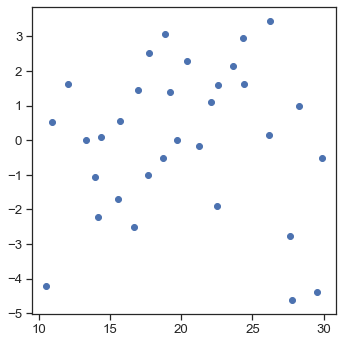

In [1211]:
plt.figure(figsize = (5,5))
plt.scatter(yHatTrain, residuals)
plt.tight_layout()

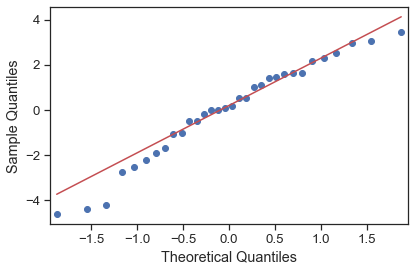

In [1212]:
t = qqplot(residuals, line = 'q')
plt.tight_layout()

# normality is improved when data outliers are removed

#### Covariance

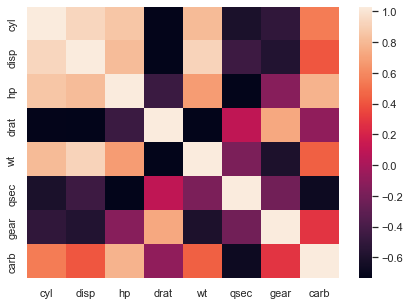

In [1213]:
# Plot heatmap for feature covariance
plt.figure(figsize = (7,5))
sns.set(font_scale = 1)
s = sns.heatmap(xTrainPrep.cov())

### Feature Engineering

In [1214]:
# Create every possible bivariate combination to be tested for feature engineering
interactions = list(combinations(xTrainPrep.columns, 2))
#interactions

In [1215]:
# Iterate through interaction list to perform linear regression for each possible engineered features
interactionDict = {}
for interaction in interactions:
    xTrainInt = xTrainPrep
    xTrainInt["int"] = xTrainInt[interaction[0]] * xTrainInt[interaction[1]]
    lr1 = LinearRegression()
    lr1.fit(xTrainInt, yTrain)
    interactionDict[lr1.score(xTrainInt, yTrain)] = interaction

In [1216]:
# Sort engineered features by best performers, top performers to be selected for final regression
topFiveInteractions = sorted(interactionDict.keys(), reverse = True)[:5]
for interaction in topFiveInteractions:
    print(interactionDict[interaction])

('hp', 'wt')
('am', 'qsec')
('disp', 'hp')
('am', 'disp')
('wt', 'qsec')


In [1217]:
# Add the top two interaction features (which exclude a categorical variable) to existing dataframe for feature engineered model
xTrainInt = xTrainPrep

# def appendInteractions(dataFrame, topInteractions):
#     i = 0
#     for interaction in topInteractions:
#         a = interactionDict[interaction][0]
#         b = interactionDict[interaction][1]
#         if (a or b) not in categoricals:
#             i += 1
#             dataFrame[f"intr{i}"] = dataFrame[a] * dataFrame[b]


# appendInteractions(xTrainInt, interactionDict)

i = 0
for interaction in topFiveInteractions:
    a = interactionDict[interaction][0]
    b = interactionDict[interaction][1]
    if (a or b) not in categoricals:
        i += 1
        xTrainInt[f"intr{i}"] = xTrainInt[a] * xTrainInt[b]

xTrainInt.drop("int", axis = 1, inplace = True)

xTrainInt.head()

,vs,am,cyl,disp,hp,drat,wt,qsec,gear,carb,intr1,intr2,intr3
0,0,1,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,0.430331,0.746967,0.337157,0.315184,0.489684
1,0,1,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,0.430331,0.746967,0.193205,0.315184,0.167457
2,1,1,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,0.430331,-1.140108,0.741215,0.800364,-0.403252
3,1,0,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,-0.946729,-1.140108,0.001270,-0.121570,-0.002114
4,0,0,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.946729,-0.511083,0.097041,0.444627,-0.108988


In [1218]:
lr2 = LinearRegression()
lr2.fit(xTrainInt, yTrain)
lr2.score(xTrainInt, yTrain)

0.9266987335202759

#### Polynomial

In [1219]:
polyDict = {}
for feature in xTrainInt.columns:
    for p in range(2,5):
        xTrainPoly = xTrainInt # use xTrainPrep to ignore other engineered features
        xTrainPoly["sq"] = xTrainPoly[feature] ** p
        lr3 = LinearRegression()
        lr3.fit(xTrainPoly, yTrain)
        polyDict[lr3.score(xTrainPoly, yTrain)] = [feature, p]
    
topPoly = polyDict[max(polyDict.keys())]

topPoly

['wt', 3]

In [1220]:
xTrainFinal = xTrainInt
xTrainFinal["poly0"] = xTrainFinal[topPoly[0]] ** topPoly[1]
xTrainFinal.drop("sq", axis = 1, inplace = True)

In [1221]:
lr4 = LinearRegression()
lr4.fit(xTrainFinal, yTrain)
print(lr4.score(xTrainFinal, yTrain))

print(lr4.intercept_)
print(lr4.coef_)
print(lr4.feature_names_in_)

0.9357364649432343
18.94328037634827
[-0.75727517  0.1245058  -0.40736888  1.46244325 -3.5609309  -1.12859248
 -0.47979896  0.4961276   3.13553871 -0.47745026  2.41360259 -0.33036453
 -2.38696377 -0.71571213]
['vs' 'am' 'cyl' 'disp' 'hp' 'drat' 'wt' 'qsec' 'gear' 'carb' 'intr1'
 'intr2' 'intr3' 'poly0']


### Principal Component Analysis

In [1222]:
# Perform PCA (w/o limits on n_components)
carsOriginal = pd.DataFrame(sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data)
pca = PCA()
_ = pca.fit_transform(carsOriginal[carsOriginal.columns])
pcaComponents = np.arange(pca.n_components_) + 1

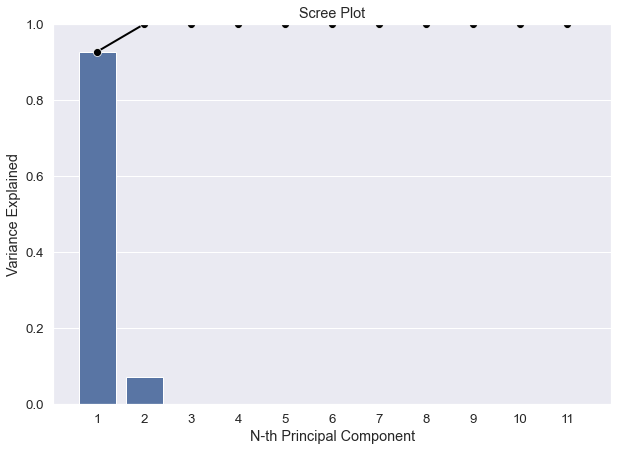

In [1223]:
# Scree Plot
_ = sns.set(style="darkgrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=pcaComponents, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=pcaComponents-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title("Scree Plot")
plt.xlabel("N-th Principal Component")
plt.ylabel("Variance Explained")
plt.ylim(0, 1)
plt.show()

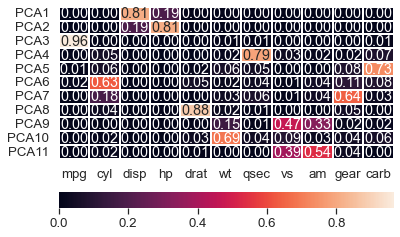

In [1224]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(carsOriginal.columns),
                 annot=True,
                 fmt='.2f',
                 square=False,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [1225]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components = 2)
pcaArray = pca.fit_transform(carsOriginal)

# Convert back to DataFrame for readability
carsPCA = pd.DataFrame(data = pcaArray)
carsPCA.columns = ["pc" + str(col+1) for col in carsPCA.columns.values]
#carsPCA['label'] = y

#carsPCA.head()

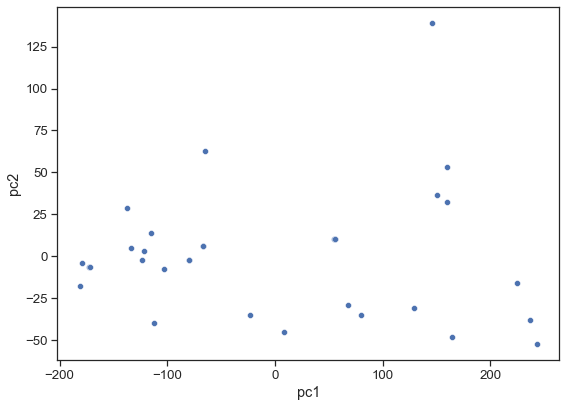

In [1226]:
# Plot principal components
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(9, 6.5))
_ = sns.scatterplot(data=carsPCA, x="pc1", y="pc2")

In [1227]:
lr5 = LinearRegression()
lr5.fit(carsPCA, yTrain)
lr5.score(carsPCA, yTrain)

0.7490476586177912

In [1228]:
carsFE = xTrainFinal.reset_index()
carsFE = carsFE.drop(carsFE.columns[0], axis = 1)
xEverything = pd.merge(carsFE, carsPCA, left_index = True, right_index = True)

lr6 = LinearRegression()
lr6.fit(xEverything, yTrain)
lr6.score(xEverything, yTrain)

1.0

### Predicting

In [1232]:
sampleCar = pd.DataFrame({
    "mpg":[16], 
    "cyl":[8], 
    "disp":[6000], 
    "hp":[400], 
    "drat":[2.15], 
    "wt":[3.725], 
    "qsec":[13.1], 
    "vs":[0], 
    "am":[1], 
    "gear":[6], 
    "carb":[4]})

aCar = sampleCar.drop("mpg", axis = 1)

for col in categoricals:
    aCar[col] = aCar[col].astype(object)

# aCar.cyl = aCar.cyl.map({4:"cyl4",6:"cyl6",8:"cyl8"})
# aCar.gear = aCar.gear.map(genCategoricalLabels("gear",3,6))
# aCar.carb = aCar.carb.map(genCategoricalLabels("carb",1,8))

aCarNumeric = aCar.select_dtypes(exclude = "object")
aCarNumeric = pd.DataFrame(scaler.transform(aCarNumeric))
aCarNumeric.columns = xNumericCols

aCarCategorical = aCar.select_dtypes(include = 'object')

aCar = pd.merge(aCarCategorical, aCarNumeric, left_index = True, right_index = True)

In [1230]:
aCar[f"intr1"] = aCar["hp"] * aCar["wt"]
aCar[f"intr2"] = aCar["disp"] * aCar["hp"]
aCar[f"intr3"] = aCar["wt"] * aCar["qsec"]

aCar["poly0"] = aCar[topPoly[0]] ** topPoly[1]

aCar

,vs,am,cyl,disp,hp,drat,wt,qsec,gear,carb,intr1,intr2,intr3,poly0
0,0,1,1.031121,47.294289,3.753719,-2.74877,0.527232,-2.699993,3.184453,0.746967,1.979083,177.529483,-1.423524,0.146557


In [1231]:
lr4.predict(aCar)

array([35.00457129])